# Lab 10 - Word Sense Disambiguation

### Load senses and lemmas

In [1]:
senses = dict()
lemmas = dict()

### Define accepted POS

In [2]:
accepted=[ 'NN', 'NNS','NNP', 'NNPS', 'MD', 'VB', 'VBD', 'VBG', 'VBN', 'VBZ','JJ', 'JJR', 'JJS'] 

### Load senses and the target

In [3]:
target = 'bank'
x = 0 # for iteration

In [4]:
# sense generated from Bank-senses.txt and lemmatized via CoreNLP
sense_file_name = 'Lab 10/senses.txt.conll'

import os
sense_file_name = os.path.join(os.getcwd(), sense_file_name)

In [5]:
with open(sense_file_name) as f:
    for line in f:
        items = line.strip().split('\t')
        if len(items) > 1:
            lemma = items[2]
            pos = items[3]
            # check for new sense
            if lemma == '#':
                senses[x] = lemmas
                x += 1
                lemmas = set()
            elif pos in accepted:
                # check if the lemma matches the target, exlclude if true
                if lemma != target:
                    lemmas.add(lemma)
senses[x] = lemmas

In [6]:
senses

{0: {},
 1: {'body',
  'canoe',
  'current',
  'land',
  'pull',
  'river',
  'sit',
  'slope',
  'sloping',
  'watch',
  'water'},
 2: {'accept',
  'activity',
  'banking',
  'cash',
  'channel',
  'check',
  'company',
  'concern',
  'deposit',
  'depository',
  'financial',
  'hold',
  'home',
  'institution',
  'lending',
  'money',
  'mortgage'},
 3: {'earth', 'huge', 'long', 'pile', 'ridge'},
 4: {'arrangement', 'object', 'operate', 'row', 'similar', 'switch', 'tier'},
 5: {'emergency', 'future', 'hold', 'reserve', 'stock', 'supply', 'use'},
 6: {'Carlo',
  'Monte',
  'break',
  'dealer',
  'fund',
  'gambling',
  'game',
  'hold',
  'house',
  'try'},
 7: {'be',
  'camber',
  'cant',
  'centrifugal',
  'effect',
  'force',
  'higher',
  'inside',
  'order',
  'outside',
  'reduce',
  'road',
  'slope',
  'track',
  'turn'},
 8: {'be',
  'box',
  'coin',
  'container',
  'empty',
  'home',
  'keep',
  'money',
  'savings',
  'slot',
  'top'},
 9: {'Nassau',
  'Witherspoon',
  'ba

## Task 1

Already done using wordnet and corenlp

## Task 2

### Dice Coefficient

$$
D = \frac{2M}{C + I}
$$

M = number of matching words

C = number of words in a context

I = number of words in glosses/senses, also known as indicators

In [7]:
def get_dice_coefficient(m, c, i):
    d = float(2 * m) / float(c + i)
    return round(d, 2)

### Load sentence for sense disambiguation

In [8]:
sentence_file_name = os.path.join(os.getcwd(), 'Lab 10/sentence.txt.conll')

sentence = set()

with open(sentence_file_name) as f:
    for line in f:
        items = line.strip().split('\t')
        if len(items) > 1:
            lemma = items[2]
            pos = items[3]

            if pos in accepted:
                if lemma != target:
                    sentence.add(lemma)

In [9]:
sentence

{'go', 'last', 'money', 'river', 'time', 'watch', 'withdraw'}

The most probable sense here for the input sentence `After withdrawing all the money, he went to the bank to watch the river for the last time.` is `senses[1]` which refers to the bank of a river.

In [10]:
dices = list()
overlaps = list()

for x in range(len(senses)):
    print('sense: {}'.format(x))
    overlap = 0
    for indicator in senses[x]:
        for word in sentence:
            if indicator == word:
                overlap += 1
                print('-> ', end='')
        print(indicator)
    d = get_dice_coefficient(overlap, len(sentence), len(senses[x]))
    dices.append(d)

    print('dice coefficient: {}'.format(d))
    print()

    # for plotting
    overlaps.append(overlap)

sense: 0
dice coefficient: 0.0

sense: 1
-> river
sloping
-> watch
current
land
sit
pull
slope
water
canoe
body
dice coefficient: 0.22

sense: 2
financial
cash
accept
lending
mortgage
channel
depository
company
home
banking
-> money
hold
concern
check
activity
deposit
institution
dice coefficient: 0.08

sense: 3
pile
huge
earth
ridge
long
dice coefficient: 0.0

sense: 4
operate
switch
tier
similar
arrangement
object
row
dice coefficient: 0.0

sense: 5
future
stock
emergency
supply
hold
use
reserve
dice coefficient: 0.0

sense: 6
fund
break
Carlo
game
gambling
try
Monte
hold
dealer
house
dice coefficient: 0.0

sense: 7
cant
reduce
order
force
higher
turn
effect
road
outside
centrifugal
slope
inside
track
be
camber
dice coefficient: 0.0

sense: 8
slot
container
be
savings
keep
-> money
top
coin
empty
home
box
dice coefficient: 0.11

sense: 9
Witherspoon
building
transact
business
banking
Nassau
corner
be
dice coefficient: 0.0

sense: 10
maneuver
plane
longitudinal
axis
flight
tip
turn
ai

In [11]:
dices

[0.0, 0.22, 0.08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11, 0.0, 0.12]

## Task 3
Applying Lesk Algorithm : finding the max overlap, which is again the most significant sense found above.

In [12]:
sense_index = dices.index(max(dices))

print('target: {}\t index: {}'.format(target, sense_index))
print('dice coefficient: {}'.format(dices[sense_index]))
print('context: {}'.format(sentence))
print('indicators/glosses/senses: {}'.format(senses[sense_index]))
print('interception: {}'.format(senses[sense_index] & sentence))

target: bank	 index: 1
dice coefficient: 0.22
context: {'river', 'watch', 'withdraw', 'time', 'money', 'go', 'last'}
indicators/glosses/senses: {'river', 'sloping', 'watch', 'current', 'land', 'sit', 'pull', 'slope', 'water', 'canoe', 'body'}
interception: {'river', 'watch'}


## Extra : Plotting dice-coefficient vs overlap

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt

Text(0.5, 0, 'dice-coefficient')

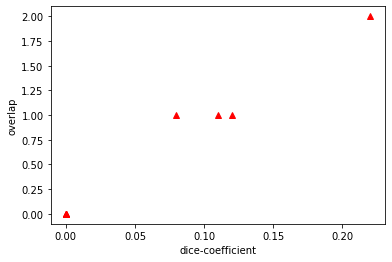

In [14]:
x_ax = dices
y_ax = overlaps

plt.plot(x_ax, y_ax, 'r^')
plt.ylabel('overlap')
plt.xlabel('dice-coefficient')

Overlap grows with Dice Coefficient.